# Myopia Clusters

In this assignment, you’ll apply what you learned about unsupervised learning by fitting data to a model and using clustering algorithms to place data into groups. Then, you’ll create a visualization that shares your findings. 

## Background

You are on the data science team of a medical research company that’s interested in finding better ways to predict myopia, or nearsightedness. Your team has tried—and failed—to improve their classification model when training on the whole dataset. However, they believe that there might be distinct groups of patients that would be better to analyze separately. So, your supervisor has asked you to explore this possibility by using unsupervised learning.

You have been provided with raw data, so you’ll first need to process it to fit the machine learning models. You will use several clustering algorithms to explore whether the patients can be placed into distinct groups. Then, you’ll create a visualization to share your findings with your team and other key stakeholders.

## Instructions

This activity is broken down into four parts: 

* Part 1: Prepare the Data

* Part 2: Apply Dimensionality Reduction 

* Part 3: Perform a Cluster Analysis with K-means

* Part 4: Make a Recommendation 

###### Importing dependencies

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

### Part 1: Prepare the Data

1. Read `myopia.csv` into a Pandas DataFrame.

2. Remove the "MYOPIC" column from the dataset.

    * **Note:** The target column is needed for supervised machine learning, but it will make an unsupervised model biased. After all, the target column is effectively providing clusters already! 


3. Standardize your dataset so that columns that contain larger values do not influence the outcome more than columns with smaller values.


In [13]:
# 1.1 Read myopia.csv into a Pandas DataFrame.
file_path = Path('Resources/Myopia.csv')
Myopia_df = pd.read_csv(file_path)
df.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0


In [14]:
# Remove the "MYOPIC" column from the dataset.
Myopia_data = Myopia_df.drop(['MYOPIC'], axis=1)
Myopia_data.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0


In [15]:
#Standardize your dataset into smaller values.
scaler = StandardScaler()
scaled_data = scaler.fit_transform(Myopia_data)

In [16]:
# Save the cleaned dataframe as a new csv file for future analysis
file_path = Path('Resources/Myopia(cleaned).csv')
df.to_csv(file_path, index=False)

### Part 2: Apply Dimensionality Reduction

1. Perform dimensionality reduction with PCA. How did the number of the features change?

* **Hint:** Rather than specify the number of principal components when you instantiate the PCA model, state the desired **explained variance**. For example, say that a dataset has 100 features. Using `PCA(n_components=0.99)` creates a model that will preserve approximately 99% of the explained variance, whether that means reducing the dataset to 80 principal components or 3. For this assignment, preserve 90% of the explained variance in dimensionality reduction.

    <mark>*The change in features were reduced from **14 to 10** with 618 samples.*</mark>

    <mark>*The outputs of the PCA can be used as input to train a model.*</mark>

    <mark>*PCA is a method used to reduce number of variables in your data by extracting important ones from a large pool.*</mark>

    <mark>*It reduces the dimension of the data with the aim of retaining as much information as possible (~90% for our data below).*</mark>
    
    <mark>In other words, this method combines highly correlated variables together to form a smaller number of an artificial set of variables which is called “principal components” that account for most variance in the data.</mark>


2. Further reduce the dataset dimensions with t-SNE and visually inspect the results. To do this, run t-SNE on the principal components, which is the output of the PCA transformation. 


3. Create a scatter plot of the t-SNE output. Are there distinct clusters?


In [17]:
# Perform dimensionality reduction with PCA at n_components=0.90
pca = PCA(n_components=0.90)
pca_transformed_data = pca.fit_transform(scaled_data)

In [19]:
# pca_transformed_data variance to detect the importance of components. Principle component 1 and 2 
pca.explained_variance_ratio_

array([0.21177355, 0.15659716, 0.08688023, 0.08301762, 0.07584858,
       0.06997878, 0.06486986, 0.06377808, 0.05393666, 0.05205566])

In [20]:
# Run t-SNE
tsne = TSNE(learning_rate=50)
transformed_features = tsne.fit_transform(pca_transformed_data)

/Users/aodhnaitelliott/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


In [21]:
# Checking that thw dimensions have been reduced to two
transformed_features.shape

(618, 2)

In [23]:
Myopia_data["X"] = transformed_features[:,0]
Myopia_data["y"] = transformed_features[:,1]
Myopia_data["Myopic"] = Myopia_df["MYOPIC"]
Myopia_data.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,X,y,Myopic
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,-1.938991,2.062733,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,-8.243249,-26.298420,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,6.039886,23.468275,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,13.759596,12.864415,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,-9.886528,-7.965433,0


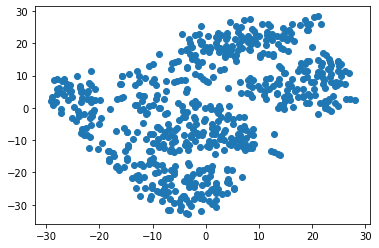

In [24]:
plt.scatter(Myopia_data["X"], Myopia_data["y"])
plt.show()

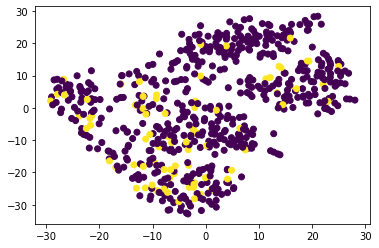

In [27]:
plt.scatter(Myopia_data["X"], Myopia_data["y"], c=Myopia_data["Myopic"])
plt.show()

In [29]:
labels = Myopia_data["Myopic"]
labels.value_counts()

0    537
1     81
Name: Myopic, dtype: int64

### Part 3: Perform a Cluster Analysis with K-means

Create an elbow plot to identify the best number of clusters. Make sure to do the following:

* Use a `for` loop to determine the inertia for each `k` between 1 through 10. 

* If possible, determine where the elbow of the plot is, and at which value of `k` it appears.

In [31]:
df_myopia_pca = pd.DataFrame(data=pca_transformed_data, columns=["principal component 1", "principal component 2",
                                                                "principal component 3","principal component 4",
                                                                 "principal component 5","principal component 6",
                                                                 "principal component 7",
                                                                 "principal component 8","principal component 9",
                                                                 "principal component 10"])
df_myopia_pca.head()

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8,principal component 9,principal component 10
0,0.535503,1.145004,-1.385019,0.116006,-3.226691,-1.928459,-1.958892,-1.922997,0.026753,0.178144
1,-0.624706,-1.575786,-0.794253,1.156287,0.292256,0.349060,-0.455206,0.285332,0.689683,-0.557031
2,-0.933479,-0.717076,0.820150,-1.547638,0.173941,0.272783,0.025821,-0.030817,-0.431499,0.013336
3,0.106354,1.192475,-0.024441,1.507469,-2.356836,-0.023139,0.236418,-1.717109,-1.230785,-0.703400
4,-0.388503,-2.839655,-0.229767,-0.622510,0.271458,-0.928956,0.537900,-1.301787,0.279007,0.631183


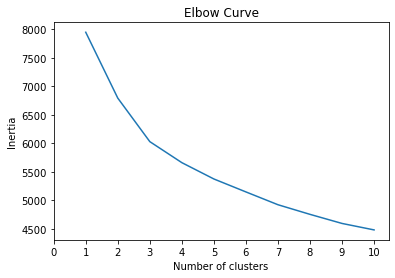

In [32]:
# Finding the best value for k
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(df_myopia_pca)
    inertia.append(km.inertia_)

# Creating the Elbow Curve
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(list(range(11)))
plt.title('Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [33]:
df_elbow.head()

,k,inertia
0,1,7948.905345
1,2,6794.415695
2,3,6031.097742
3,4,5662.587617
4,5,5376.410589


In [39]:
def get_clusters(k, df_myopia_pca):
    # Initialize the K-Means model
    model = KMeans(n_clusters=k, random_state=0)

    # Train the model
    model.fit(df_myopia_pca)

    # Predict clusters
    predictions = model.predict(df_myopia_pca)

    # Create return DataFrame with predicted clusters
    df_myopia_pca["myopic"] = model.labels_

    return df_myopia_pca

In [42]:
# df_myopia_pca["myopic"] = model.labels_
# df_myopia_pca.head()

In [43]:
clusters = get_clusters(2, df_myopia_pca)
clusters.head()

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8,principal component 9,principal component 10,myopic
0,0.535503,1.145004,-1.385019,0.116006,-3.226691,-1.928459,-1.958892,-1.922997,0.026753,0.178144,0
1,-0.624706,-1.575786,-0.794253,1.156287,0.292256,0.349060,-0.455206,0.285332,0.689683,-0.557031,1
2,-0.933479,-0.717076,0.820150,-1.547638,0.173941,0.272783,0.025821,-0.030817,-0.431499,0.013336,1
3,0.106354,1.192475,-0.024441,1.507469,-2.356836,-0.023139,0.236418,-1.717109,-1.230785,-0.703400,1
4,-0.388503,-2.839655,-0.229767,-0.622510,0.271458,-0.928956,0.537900,-1.301787,0.279007,0.631183,1


In [44]:
def show_clusters(df_myopia_pca):
    plt.scatter(df_myopia_pca['principal component 1'], df_myopia_pca['principal component 2'], 
                c=df_myopia_pca['myopic'])
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.show()

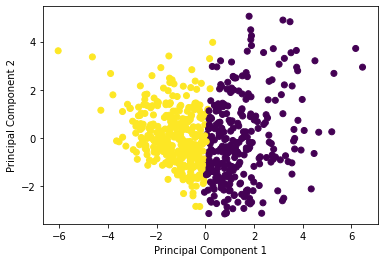

In [45]:
show_clusters(clusters)

### Part 4: Make a Recommendation

Based on your findings, write up a brief (one or two sentences) recommendation for your supervisor in your Jupyter Notebook. Can the patients be clustered? If so, into how many clusters? 


###### Can the patients be clustered?

The data (sample) is inconclusive in my opinion

There are 618 samples with 14 variables. After scaling the data and reducing the dimensions, the principle component was reduced to 618 sample with 2 components. If additional dimensions were added, the data would likely allow us to show definitive clusters to help determine whether or not patients are myopic or not.


###### If so, into how many clusters? 
Inconclusive, would need to analyse the data more